# Problem Statment

To develop a machine learning model capable of accurately recognizing and classifying handwritten digits (0-9) using the MNIST dataset. This model will be trained to learn the patterns and features of the handwritten digits and then predict the correct digit for new, unseen handwritten digit images.

The MNIST dataset, which contains 60,000 training images and 10,000 testing images of handwritten digits, each of size 28x28 pixels.

In [1]:
#importing the necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#### Loads the MNIST dataset, splitting it into training and testing sets

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [30]:
# Display the shape of the x_train array
print(x_train.shape)

(60000, 28, 28)


In [31]:
# Display the shape of the y_test array
print(y_test.shape)

(10000, 10)


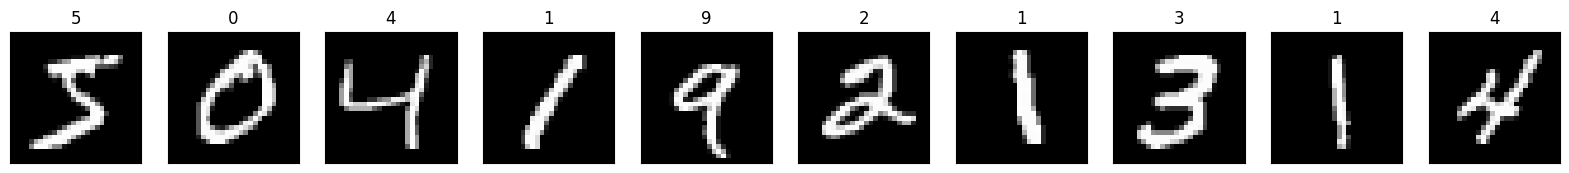

In [6]:
fig, axes = plt.subplots(ncols=10, sharex=False, sharey=True, figsize= (20,4))
for i in range(10):
    axes[i].set_title(y_train[i])
    axes[i].imshow(x_train[i], cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)

plt.show()

#### Convert the labels to one-hot encoded format for multi-class classification

In [7]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [9]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [10]:
print(y_test.shape)

(10000, 10)


#### Defines a sequential model with a flattening layer and dense layers using ReLU and softmax activations.

In [32]:
# Define a Sequential model, which allows adding layers sequentially
model = Sequential([
    Flatten(input_shape = (28,28)), # Add a Flatten layer to convert the 28x28 input images into a 1D array
    Dense(128, activation='relu'),  # First hidden layer with 128 neurons and ReLU as activation function
    Dense(64, activation='relu'),   # Second Hidden layer with 64 neurons and ReLU as activation function
    
# Add the output layer with 10 neurons (one for each class) and 'softmax' activation function
# Softmax is used for multi-class classification to output probabilities for each class
    Dense(10, activation='softmax')
])

#### Display a summary of the model architecture, including the number of parameters in each layer

In [33]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 109386 (427.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


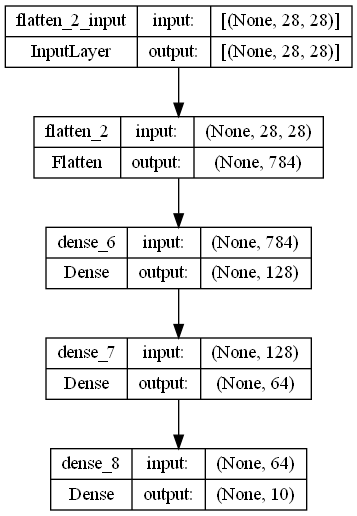

In [35]:
from tensorflow.keras import utils
# Visualize the architecture of the model with its layer shapes
utils.plot_model(model, show_shapes=True)

#### Compiles the model using the Adam optimizer, categorical cross-entropy loss, and accuracy metric.

In [36]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [37]:
# Train the model for one epoch on the training data and validate on the test data, storing the training history
history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test))

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5966 - acc: 0.8704 - val_loss: 0.4605 - val_acc: 0.9021
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3182 - acc: 0.9244 - val_loss: 0.2870 - val_acc: 0.9334
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2397 - acc: 0.9395 - val_loss: 0.2106 - val_acc: 0.9450
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1949 - acc: 0.9492 - val_loss: 0.2189 - val_acc: 0.9461
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1620 - acc: 0.9559 - val_loss: 0.1986 - val_acc: 0.9535
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1277 - acc: 0.9633 - val_loss: 0.1740 - val_acc: 0.9565
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1162 - acc: 0.9675 - val_loss: 0.1386 - val_acc: 0.9638
Epoch 8/15
1875/1875 [==============================] - 3s 2ms

In [40]:
# Saving the trained model to a file 
model.save('mnist_model.h5')

#### Plotting the graph for both Accuracy and Loss

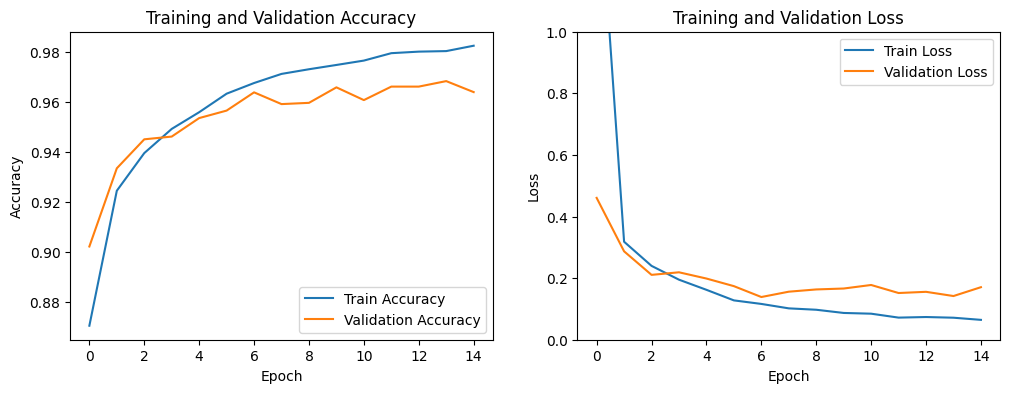

In [41]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 1])
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [42]:
# Loading the pre-trained model from the file
model = tf.keras.models.load_model('mnist_model.h5')

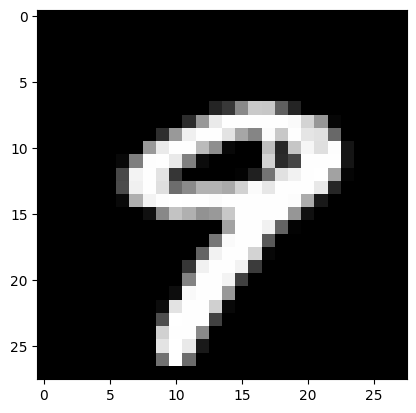

In [43]:
# Displaying the first test image from the dataset
plt.imshow(x_test[9], cmap='gray')

In [44]:
import numpy as np

x = np.reshape(x_test[9], (1, 28, 28))           # Reshaping the first test image to match the model's input shape
predicted_label = np.argmax(model.predict(x))    # Using the trained model to predict the class label for the input image
print(predicted_label)                           # Printing the predicted class label

1/1 [==============================] - 0s 60ms/step
9
